In [16]:
import pandas as pd
import numpy as np
import json

In [17]:
nli_output = pd.read_json('eval_output/eval_predictions.jsonl', lines=True)

nli_output['result'] = np.where(nli_output['label']==nli_output['predicted_label'], "Accurate", "Mistake")
nli_output['result_copy'] = nli_output['result']

nli_output.head()

,premise,hypothesis,label,predicted_scores,predicted_label,result,result_copy
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,1,"[-2.296041488647461, 4.715046405792236, -2.538...",1,Accurate,Accurate
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,0,"[3.316367864608764, -1.679234862327575, -3.815...",0,Accurate,Accurate
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,2,"[-4.425111770629883, -2.9563229084014893, 5.39...",2,Accurate,Accurate
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,0,"[3.4208450317382812, -1.981903791427612, -3.62...",0,Accurate,Accurate
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,1,"[-3.123510837554931, 3.1808440685272212, 0.207...",1,Accurate,Accurate


In [18]:
nli_output_by_premise = nli_output.groupby(['premise','result'])['result_copy'].count().reset_index().pivot_table(index = 'premise', columns = 'result').reset_index()
nli_output_by_premise.fillna(0,inplace = True)
nli_output_by_premise.head()

premise result_copy        
result                                                       Accurate Mistake
0       2 people in blue and purple costumes are looki...         3.0     0.0
1       2 rows of woman walking towards each other on ...         2.0     1.0
2        2 woman walking down the street next to graffiti         1.0     2.0
3             3 people having coffee outside of a museum.         3.0     0.0
4       3 people sitting in a boat, rowing in a large ...         3.0     0.0

In [19]:
nli_output_by_premise[(nli_output_by_premise['result_copy', 'Mistake']>0.0) 
                     &(nli_output_by_premise['result_copy', 'Accurate']==0.0)]

premise result_copy        
result                                                       Accurate Mistake
295                     A determined crosscountry runner.         0.0     3.0
688      A little girl is walking over a path of numbers.         0.0     3.0
1467    A smiling policewoman holding a blue axe and w...         0.0     1.0
1520    A thrill seeker uses her arms for balance whil...         0.0     1.0
1591    A woman holds her child out of a red window, n...         0.0     1.0
1796    A wrestler in purple curls up in a ball while ...         0.0     2.0
1947               A young puppy suckles from his mother.         0.0     3.0
2074    At an outdoor event in an Asian-themed area, a...         0.0     3.0
2171    Four children playing at a preschool, one look...         0.0     3.0
2727    Three hikers are hiking in a mountain filled w...         0.0     2.0
2846    Two children lined up outside in a grassy fiel...         0.0     3.0
3034    Two people are walking towards a wooded building.         0.0     1.0

In [20]:
nli_output_by_premise[(nli_output_by_premise['result_copy', 'Mistake']==0.0) 
                     &(nli_output_by_premise['result_copy', 'Accurate']>0.0)]

premise result_copy        
result                                                       Accurate Mistake
0       2 people in blue and purple costumes are looki...         3.0     0.0
3             3 people having coffee outside of a museum.         3.0     0.0
4       3 people sitting in a boat, rowing in a large ...         3.0     0.0
6       3 people, one man playing a guitar while sitti...         3.0     0.0
7       3 women and 2 men waiting by a wall in the par...         3.0     0.0
...                                                   ...         ...     ...
3314     well dressed man and woman dancing in the street         3.0     0.0
3315    woman with not a whole lot of clothes on playi...         3.0     0.0
3316               women in a hat a making selling goods.         3.0     0.0
3317    women wearing black tank top cutting another w...         3.0     0.0
3318    young female in striped shirt holding baby boy...         3.0     0.0

[2405 rows x 3 columns]

In [23]:
nli_output[nli_output['premise'].str.startswith('2 people in blue and purple costumes are')]

,premise,hypothesis,label,predicted_scores,predicted_label,result,result_copy
1202,2 people in blue and purple costumes are looki...,2 Renaissance fair performers about to tandem ...,1,"[-4.187444686889648, 3.073391675949096, 1.0985...",1,Accurate,Accurate
1203,2 people in blue and purple costumes are looki...,2 people looking at one another,0,"[3.392786502838134, -1.437653183937072, -4.275...",0,Accurate,Accurate
1204,2 people in blue and purple costumes are looki...,2 men drive a golf cart,2,"[-4.894619941711426, -2.400303602218628, 5.343...",2,Accurate,Accurate


In [42]:
with pd.ExcelWriter('nli_output_marked.xlsx', engine='xlsxwriter') as writer:
    nli_output.to_excel(writer, sheet_name='nli output')
    nli_output_by_premise.to_excel(writer, sheet_name='nli output by premise')

In [9]:
qa_output = pd.read_json('eval_output_qa/eval_predictions_qa.jsonl', lines = True)

In [10]:
qa_output

,id,title,context,question,answers,predicted_answer
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,"{'text': ['Denver Broncos', 'Denver Broncos', ...",Denver Broncos
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,"{'text': ['Carolina Panthers', 'Carolina Panth...",Carolina Panthers
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,"{'text': ['Santa Clara, California', 'Levi's S...","San Francisco Bay Area at Santa Clara, California"
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ...",Carolina Panthers
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 was an American football game to...,What color was used to emphasize the 50th anni...,"{'text': ['gold', 'gold', 'gold'], 'answer_sta...",gold
...,...,...,...,...,...,...
10565,5737aafd1c456719005744fb,Force,"The pound-force has a metric counterpart, less...",What is the metric term less used than the New...,"{'text': ['kilogram-force', 'pound-force', 'ki...",The pound-force
10566,5737aafd1c456719005744fc,Force,"The pound-force has a metric counterpart, less...",What is the kilogram-force sometimes reffered ...,"{'text': ['kilopond', 'kilopond', 'kilopond', ...",kilopond
10567,5737aafd1c456719005744fd,Force,"The pound-force has a metric counterpart, less...",What is a very seldom used unit of mass in the...,"{'text': ['slug', 'metric slug', 'metric slug'...",kilogram-force
10568,5737aafd1c456719005744fe,Force,"The pound-force has a metric counterpart, less...",What seldom used term of a unit of force equal...,"{'text': ['kip', 'kip', 'kip', 'kip', 'kip'], ...",sthène


In [4]:
mnli_output = pd.read_json('eval_output_mnli/eval_predictions.jsonl', lines=True)

mnli_output['result'] = np.where(mnli_output['label']==mnli_output['predicted_label'], "Accurate", "Mistake")
mnli_output['result_copy'] = mnli_output['result']

In [5]:
mnli_output.head()

,premise,hypothesis,label,idx,predicted_scores,predicted_label,result,result_copy
0,The new rights are nice enough,Everyone really likes the newest benefits,1,0,"[-0.233887940645217, 2.226482629776001, -1.997...",1,Accurate,Accurate
1,This site includes a list of all award winners...,The Government Executive articles housed on th...,2,1,"[-2.8484292030334473, -1.433066606521606, 3.16...",2,Accurate,Accurate
2,uh i don't know i i have mixed emotions about ...,"I like him for the most part, but would still ...",0,2,"[-0.37061578035354603, 1.8392161130905151, -1....",1,Mistake,Mistake
3,yeah i i think my favorite restaurant is alway...,My favorite restaurants are always at least a ...,2,3,"[-2.2399263381958012, -0.883810579776763, 2.42...",2,Accurate,Accurate
4,i don't know um do you do a lot of camping,I know exactly.,2,4,"[-2.343526363372802, -2.139444589614868, 3.307...",2,Accurate,Accurate


In [6]:
mnli_output_by_premise = mnli_output.groupby(['premise','result'])['result_copy'].count().reset_index().pivot_table(index = 'premise', columns = 'result').reset_index()
mnli_output_by_premise.fillna(0,inplace = True)
mnli_output_by_premise.head()


premise result_copy        
result                                                       Accurate Mistake
0         There's nothing like the trendy resort cloth...         0.0     3.0
1                     "An egg has got to hatch," he said.         3.0     0.0
2                   "Give it to me." He handed it to her.         2.0     1.0
3        "So your girl writes that your little farewel...         2.0     1.0
4        "The summons was only for Dave Hanson," Ser P...         2.0     1.0

In [8]:
mnli_output_by_premise[(mnli_output_by_premise['result_copy', 'Mistake']>0.0) 
                     &(mnli_output_by_premise['result_copy', 'Accurate']==0.0)]

premise result_copy        
result                                                       Accurate Mistake
0         There's nothing like the trendy resort cloth...         0.0     3.0
41      'Dave Hanson, to whom nothing was impossible.'...         0.0     3.0
154     A newly unified Christian Spain under the Cath...         0.0     3.0
170     A student visa overstayer is not going to be a...         0.0     3.0
201     After the recovery of Jerusalem in 1099, it to...         0.0     3.0
...                                                   ...         ...     ...
3280    yeah well the uh NC double A tournament's goin...         0.0     3.0
3287    yeah yeah seven percent or something it depend...         0.0     2.0
3305    yes they would they just wouldn't be able to o...         0.0     3.0
3309    you can get a hard copy of it and that's about it         0.0     3.0
3311                     you don't think it's a deterrent         0.0     3.0

[128 rows x 3 columns]

In [9]:
mnli_output_by_premise[(mnli_output_by_premise['result_copy', 'Mistake']==0.0) 
                     &(mnli_output_by_premise['result_copy', 'Accurate']>0.0)]

premise result_copy        
result                                                       Accurate Mistake
1                     "An egg has got to hatch," he said.         3.0     0.0
5        "You're not going to marry him, do you hear?"...         3.0     0.0
7        8th circa b.c.Greeks colonize Sicily and othe...         3.0     0.0
14                         He grimaced at his own doubts.         3.0     0.0
16                                    It was utterly mad.         3.0     0.0
...                                                   ...         ...     ...
3320    you know like CODA comes out of your out of yo...         3.0     0.0
3322    you know our church each year has a one of the...         3.0     0.0
3323    you know some of the really the really emotion...         3.0     0.0
3325    you know they they like what they're doing the...         3.0     0.0
3333                    … I succeeded in my false career.         3.0     0.0

[1166 rows x 3 columns]

In [ ]:
# Trained on snli and evaluating on mnli give less accuracy 
# How would be the other way around?

In [ ]:
# Check the model after training and before training

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, \
    AutoModelForQuestionAnswering, Trainer, TrainingArguments, HfArgumentParser

In [2]:
model = AutoModelForSequenceClassification.from_pretrained('google/electra-small-discriminator')

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
model

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [4]:
trained_model = AutoModelForSequenceClassification.from_pretrained('trained_model/')

In [5]:
trained_model

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

# All eval outputs

In [2]:
import pandas as pd
import numpy as np
import json
import os

In [10]:
eval_outputs_list = os.listdir('../eval_outputs')
eval_outputs_list.remove(".DS_Store")
eval_outputs_list

In [43]:
outputs_list = []
for path in eval_outputs_list:
    print(path)
    output = pd.read_json('/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_outputs/' + path + '/eval_metrics.json')
    print(output)

eval_output_nli_b256


ValueError: If using all scalar values, you must pass an index

In [44]:
outputs_list = []
for path in eval_outputs_list:
    print(path)
    output = pd.read_json('/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_outputs/' + path + '/eval_predictions.jsonl', lines=True)

    output['result'] = np.where(output['label']==output['predicted_label'], "Accurate", "Mistake")
    output['result_copy'] = output['result']
    
    output_by_premise = output.groupby(['premise','result'])['result_copy'].count().reset_index().pivot_table(index = 'premise', columns = 'result').reset_index()
    output_by_premise.fillna(0,inplace = True)
    
    outputs_list.append(output_by_premise[output_by_premise['result_copy', 'Accurate']==0])

eval_output_nli_b256
eval_output_nli_b128
eval_output_nli_b64
eval_output_mnli_b64
eval_output_mnli_b128
eval_output_mnli_b256


In [45]:
outputs_list[0]

premise result_copy        
result                                                       Accurate Mistake
154       A boy with a basketballs glowers at the camera.         0.0     3.0
1050    A man is wearing blue button down shirt talkin...         0.0     3.0
1091        A man reclining with his feet up on the desk.         0.0     3.0
1467    A smiling policewoman holding a blue axe and w...         0.0     1.0
1520    A thrill seeker uses her arms for balance whil...         0.0     1.0
1591    A woman holds her child out of a red window, n...         0.0     1.0
1796    A wrestler in purple curls up in a ball while ...         0.0     2.0
2171    Four children playing at a preschool, one look...         0.0     3.0
2753    Three people are playing a game, wearing white...         0.0     3.0
2826                  Two boys laying tile in a bathroom.         0.0     3.0
2846    Two children lined up outside in a grassy fiel...         0.0     3.0
3034    Two people are walking towards a wooded building.         0.0     1.0

In [46]:
outputs_list[1]

premise result_copy        
result                                                       Accurate Mistake
154       A boy with a basketballs glowers at the camera.         0.0     3.0
1467    A smiling policewoman holding a blue axe and w...         0.0     1.0
1520    A thrill seeker uses her arms for balance whil...         0.0     1.0
1591    A woman holds her child out of a red window, n...         0.0     1.0
1796    A wrestler in purple curls up in a ball while ...         0.0     2.0
1798           A young adolescent is jumping into a pool.         0.0     2.0
2464    Semi-pro martial artist practices his most pow...         0.0     3.0
2753    Three people are playing a game, wearing white...         0.0     3.0
2769    Three sisters, barefoot in pink dresses and wh...         0.0     3.0
2826                  Two boys laying tile in a bathroom.         0.0     3.0
2846    Two children lined up outside in a grassy fiel...         0.0     3.0
3034    Two people are walking towards a wooded building.         0.0     1.0

In [48]:
outputs_list[2]

premise result_copy        
result                                                       Accurate Mistake
1467    A smiling policewoman holding a blue axe and w...         0.0     1.0
1520    A thrill seeker uses her arms for balance whil...         0.0     1.0
1591    A woman holds her child out of a red window, n...         0.0     1.0
1796    A wrestler in purple curls up in a ball while ...         0.0     2.0
2753    Three people are playing a game, wearing white...         0.0     3.0
2769    Three sisters, barefoot in pink dresses and wh...         0.0     3.0
2846    Two children lined up outside in a grassy fiel...         0.0     3.0
3034    Two people are walking towards a wooded building.         0.0     1.0

In [50]:
outputs_list[3].shape

(31, 3)

In [38]:
outputs_list[4].shape

(42, 3)

In [39]:
outputs_list[5].shape

(48, 3)

# tsv data sets

In [54]:
train = pd.read_csv('/Users/velurib/Documents/MyDocuments/Masters/NLP/final/cartography/filtered/cartography_confidence_0.50/SNLI/train.tsv',delimiter='\t')


In [55]:
train.head()

,premise,hypothesis,label,id
0,Three older Asian people sit on a curb in a pa...,two boys ride skateboard,0,56859
1,Two people are dressed up in large festive out...,two boys ride skateboard,0,400598
2,"A well dressed, dark-haired, dark-skinned youn...",A business woman sits next to a tree.,0,246381
3,The person in yellow jacket looking funny.,two boys ride skateboard,0,94724
4,A bunch of people sitting outside a building a...,the dogs were fighting to get a bone from each...,0,501266


In [66]:
train['check_premise'] = train.apply(lambda ex: True if not isinstance(ex['premise'],(str,list)) else False,axis=1)
train['check_hypothesis'] = train.apply(lambda ex: True if not isinstance(ex['hypothesis'],(str,list)) else False,axis=1)


In [64]:
train[train['check_premise']==True]

,premise,hypothesis,label,id,check


In [67]:
train[train['check_hypothesis']==True]

,premise,hypothesis,label,id,check,check_premise,check_hypothesis
24809,Cannot see picture to describe.,NaN,0,91382,False,False,True
29282,Cannot see picture to describe.,NaN,1,91381,False,False,True
45622,Jumping with purple balls is so much fun!,NaN,0,310735,False,False,True
48607,Jumping with purple balls is so much fun!,NaN,2,310733,False,False,True
68310,Jumping with purple balls is so much fun!,NaN,1,310734,False,False,True
126240,Cannot see picture to describe.,NaN,2,91383,False,False,True


In [68]:
train[train['label']==-1]

,premise,hypothesis,label,id,check,check_premise,check_hypothesis


In [69]:
train.shape

(274684, 7)

# Read all metrics

In [2]:
import pandas as pd
import numpy as np
import json
import os

In [24]:
# directories = ['/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_output_filtered/'
#               ,'/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_output_velurib_nli/']
directories = ['/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_outputs_v2']

In [25]:
all_metrics = []
for directory in directories:
    for folder in os.listdir(directory):
        if(os.path.isdir(f'{directory}/{folder}')):
            with open(f'{directory}/{folder}/eval_metrics.json') as r:
                metrics = json.load(r)
                metrics['type'] = folder
            all_metrics.append(metrics)
#             print(metrics)

In [26]:
pd.DataFrame(all_metrics).sort_values(by='type').reset_index(drop=True)

,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,type
0,0.793016,0.649924,10.4886,935.778,0.953,eval_output_ambiguous0.25_mnli_b256
1,0.631616,0.763666,10.2037,964.554,0.980,eval_output_ambiguous0.25_nli_b256
2,0.729870,0.704228,10.3077,952.202,0.970,eval_output_ambiguous0.33_mnli_b256
3,0.530672,0.821683,10.2992,955.605,0.971,eval_output_ambiguous0.33_nli_b256
4,0.591080,0.773510,10.4626,938.099,0.956,eval_output_ambiguous0.50_mnli_b256
5,1.142114,0.333062,10.4787,939.237,0.954,eval_output_ambiguous0.50_nli_b256
6,0.543979,0.788793,10.3601,947.386,0.965,eval_output_ambiguous0.75_mnli_b256
7,1.149172,0.749848,10.3423,951.629,0.967,eval_output_easy-to-learn_0.25_nli_b256
8,1.044867,0.778907,10.1877,966.062,0.982,eval_output_easy-to-learn_0.33_nli_b256
9,0.889246,0.823918,10.2351,961.590,0.977,eval_output_easy-to-learn_0.50_nli_b256


In [27]:
pd.DataFrame(all_metrics).sort_values(by='type').reset_index(drop=True).to_csv('all_eval_metrics_v2.csv',index=False)

## Build story

In [7]:
interested_types = ['eval_output_ambiguous0.33_nli_b256',
                   'eval_output_easy-to-learn_0.75_nli_b256',
                   'eval_output_hard-to-learn_0.75_nli_b256',
                   'eval_output_nli_b256']

In [8]:
all_predictions = []
for directory in directories:
    for folder in os.listdir(directory):
        if(folder in interested_types):
            predictions_files = pd.read_json(f'{directory}/{folder}/eval_predictions.jsonl',lines=True)
            predictions_files['type'] = folder
            print(predictions_files.shape)
            all_predictions.append(predictions_files)
#             print(metrics)

(9842, 7)
(9842, 7)
(9842, 7)
(9842, 7)


In [9]:
predictions_files.head()

,premise,hypothesis,label,id,predicted_scores,predicted_label,type
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,1,0,"[-1.612814545631408, 3.312841892242431, -1.651...",1,eval_output_nli_b256
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,0,1,"[2.732680797576904, -1.083239912986755, -2.275...",0,eval_output_nli_b256
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,2,2,"[-2.897420883178711, -1.787854790687561, 3.960...",2,eval_output_nli_b256
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,0,3,"[2.151869297027588, -0.7173335552215571, -1.88...",0,eval_output_nli_b256
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,1,4,"[-2.21693754196167, 2.419140100479126, -0.2217...",1,eval_output_nli_b256


In [13]:
predictions_files.pivot_table(columns = 'predicted_label',index = 'label',aggfunc='count')['predicted_scores']

predicted_label,0,1,2
label,,,
0,3001,243,85
1,236,2746,253
2,91,275,2912


In [14]:
all_predictions_df = pd.concat(all_predictions)

In [15]:
for x in all_predictions_df['type'].unique():
    print(x)
    display(all_predictions_df[all_predictions_df['type']==x].pivot_table(index = 'label',columns = 'predicted_label', aggfunc='count')['predicted_scores'])
    

eval_output_hard-to-learn_0.75_nli_b256


predicted_label,0,1,2
label,,,
0,2978,242,109
1,226,2694,315
2,117,346,2815


eval_output_easy-to-learn_0.75_nli_b256


predicted_label,0,1,2
label,,,
0,2950,251,128
1,265,2630,340
2,131,275,2872


eval_output_ambiguous0.33_nli_b256


predicted_label,0,1,2
label,,,
0,2968,253,108
1,317,2557,361
2,173,543,2562


eval_output_nli_b256


predicted_label,0,1,2
label,,,
0,3001,243,85
1,236,2746,253
2,91,275,2912


## batch size

In [28]:
batch_size_interested_lists = ['eval_output_nli_b32','eval_output_nli_b64','eval_output_nli_b128','eval_output_nli_b256']

In [29]:
all_predictions = []
for directory in directories:
    for folder in os.listdir(directory):
        if(folder in batch_size_interested_lists):
            predictions_files = pd.read_json(f'{directory}/{folder}/eval_predictions.jsonl',lines=True)
            predictions_files['type'] = folder
            print(predictions_files.shape)
            all_predictions.append(predictions_files)
#             print(metrics)

(9842, 6)
(9842, 6)
(9842, 6)
(9842, 6)


In [32]:
all_predictions_df = pd.concat(all_predictions)

In [33]:
for x in all_predictions_df['type'].unique():
    print(x)
    display(all_predictions_df[all_predictions_df['type']==x].pivot_table(index = 'label',columns = 'predicted_label', aggfunc='count')['predicted_scores'])
    

eval_output_nli_b32


predicted_label,0,1,2
label,,,
0,3036,219,74
1,223,2804,208
2,70,242,2966


eval_output_nli_b256


predicted_label,0,1,2
label,,,
0,3008,245,76
1,238,2730,267
2,103,276,2899


eval_output_nli_b128


predicted_label,0,1,2
label,,,
0,3020,232,77
1,234,2765,236
2,82,255,2941


eval_output_nli_b64


predicted_label,0,1,2
label,,,
0,3024,225,80
1,229,2782,224
2,78,250,2950


## Weight the training examples using their training dynamics

In [34]:
td_metrics = pd.read_json('/Users/velurib/Documents/MyDocuments/Masters/NLP/final/trained_model_nli_b256/td_metrics.jsonl',lines=True)

In [52]:
ed_metrics = pd.read_json('/Users/velurib/Documents/MyDocuments/Masters/NLP/final/trained_model_velurib_nli_b256/ed_metrics.jsonl',lines=True)

In [35]:
td_metrics.head()

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
0,0,0,0.025020,0.974321,0.011581,3,0
1,1,1,0.013050,0.986775,0.010118,3,0
2,2,2,0.050777,0.946344,0.000266,3,0
3,3,3,0.023202,0.976233,0.006151,3,0
4,4,4,0.046070,0.951586,0.003785,3,0


In [37]:
td_metrics.shape

(549367, 7)

In [36]:
td_metrics[td_metrics['correctness']==3].shape

(461411, 7)

In [38]:
td_metrics[td_metrics['correctness']==3]['confidence'].describe()

count    461411.000000
mean          0.916796
std           0.104313
min           0.349132
25%           0.898510
50%           0.964352
75%           0.977982
max           0.994155
Name: confidence, dtype: float64

In [39]:
td_metrics[td_metrics['correctness']==3]['variability'].describe()

count    461411.000000
mean          0.019843
std           0.026257
min           0.000040
25%           0.004375
50%           0.008452
75%           0.024101
max           0.289704
Name: variability, dtype: float64

In [59]:
td_metrics['variability'].describe([0.9,0.95])

count    549367.000000
mean          0.025634
std           0.035634
min           0.000040
50%           0.010415
90%           0.068203
95%           0.096899
max           0.463445
Name: variability, dtype: float64

In [42]:
td_metrics.sort_values(by=['confidence','correctness'],ascending=False)

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
320628,320628,320628,0.005811,0.994155,0.002606,3,0
50789,50789,50789,0.005812,0.994154,0.002516,3,0
225535,225535,225535,0.005814,0.994152,0.002606,3,0
358961,358961,358961,0.005818,0.994148,0.002505,3,0
525893,525893,525893,0.005823,0.994143,0.002492,3,0
...,...,...,...,...,...,...,...
501266,501266,501266,0.001535,0.001537,0.000536,0,1000
94724,94724,94724,0.001476,0.001478,0.000577,0,1000
246381,246381,246381,0.001426,0.001428,0.000595,0,1000
400598,400598,400598,0.001405,0.001407,0.000606,0,1000


In [43]:
td_metrics[td_metrics['forgetfulness']==1000]

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
8,8,8,0.240928,0.404752,0.057356,0,1000
11,11,11,0.024849,0.025500,0.003047,0,1000
15,15,15,0.225901,0.344760,0.104671,0,1000
36,36,36,0.201784,0.280420,0.069371,0,1000
40,40,40,0.202116,0.281177,0.090140,0,1000
...,...,...,...,...,...,...,...
549305,549305,549305,0.005706,0.005739,0.001619,0,1000
549342,549342,549342,0.089455,0.099319,0.037180,0,1000
549345,549345,549345,0.225103,0.342213,0.057009,0,1000
549347,549347,549347,0.192572,0.260358,0.012250,0,1000


In [44]:
td_metrics['correctness'].unique()

array([3, 0, 1, 2])

In [45]:
td_metrics['correctness'].value_counts()

correctness
3    461411
0     60791
2     17226
1      9939
Name: count, dtype: int64

In [53]:
ed_metrics['correctness'].value_counts()

correctness
3    8357
0    1054
2     264
1     167
Name: count, dtype: int64

In [47]:
directory

'/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_outputs_v2'

In [49]:
predictions_files = pd.read_json(f'/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_outputs/eval_output_nli_b256/eval_predictions.jsonl',lines=True)

In [50]:
predictions_files.head()

,premise,hypothesis,label,predicted_scores,predicted_label
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,1,"[-1.662557363510131, 3.1957366466522212, -1.84...",1
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,0,"[2.592686891555786, -1.290068864822387, -2.098...",0
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,2,"[-2.647395610809326, -1.541694045066833, 4.242...",2
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,0,"[2.344310045242309, -0.7941292524337761, -2.33...",0
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,1,"[-2.539318323135376, 1.696215748786926, 0.6482...",1


In [ ]:
# Two variants
-> 45, 45, 10
-> 40, 40, 20

Hard to learn
Easy to learn
Ambiguous

## Split training dataset in three buckets

In [67]:
ambiguous_data = td_metrics[(td_metrics['variability']>= td_metrics['variability'].quantile(0.9))
                            #&(td_metrics['confidence']<= td_metrics['correctness'].quantile(0.8))
                           ].sort_values(by=['variability'],ascending=False)
ambiguous_data.head()

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
288085,288085,288085,0.223207,0.663685,0.463445,2,0
225250,225250,225250,0.222924,0.664549,0.460528,2,0
205093,205093,205093,0.223244,0.663573,0.460427,2,0
442874,442874,442874,0.223882,0.661610,0.460301,2,0
443563,443563,443563,0.222869,0.664714,0.459468,2,0


In [79]:
ambiguous_data.shape

(54937, 7)

In [133]:
non_ambiguous_data = td_metrics[~td_metrics['guid'].isin(ambiguous_data['guid'].unique())].sort_values(by=['confidence'],ascending=False)
non_ambiguous_data.head()

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
320628,320628,320628,0.005811,0.994155,0.002606,3,0
50789,50789,50789,0.005812,0.994154,0.002516,3,0
225535,225535,225535,0.005814,0.994152,0.002606,3,0
358961,358961,358961,0.005818,0.994148,0.002505,3,0
525893,525893,525893,0.005823,0.994143,0.002492,3,0


In [71]:
non_ambiguous_data.shape

(494430, 7)

In [77]:
easy_to_learn_data = non_ambiguous_data.sort_values(by=['confidence','correctness'],ascending=False).head(int(non_ambiguous_data.shape[0]/2))
hard_to_learn_data = non_ambiguous_data.sort_values(by=['confidence','correctness'],ascending=False).tail(int(non_ambiguous_data.shape[0]/2))

In [78]:
easy_to_learn_data.shape, hard_to_learn_data.shape

((247215, 7), (247215, 7))

In [80]:
247215 + 247215 + 54937

549367

## Ten ten ten approach

In [ ]:
# sample 10% of overall data the 

In [87]:
easy_to_learn_data_sample_10 = easy_to_learn_data.sample(int(easy_to_learn_data.shape[0]/4.5))
easy_to_learn_data_sample_10.shape

(54936, 7)

In [88]:
hard_to_learn_data_sample_10 = hard_to_learn_data.sample(int(hard_to_learn_data.shape[0]/4.5))
hard_to_learn_data_sample_10.shape

(54936, 7)

In [90]:
ten_ten_ten_dataset = pd.concat([ambiguous_data, hard_to_learn_data_sample_10, easy_to_learn_data_sample_10])

In [94]:
ten_ten_ten_dataset['guid'].nunique()

164809

In [95]:
ten_ten_ten_dataset.shape

(164809, 7)

In [103]:
np.save('../ten_ten_ten_appraoch.pkl',np.array(ten_ten_ten_dataset['guid'].to_list()), allow_pickle=True)

In [102]:
!pwd

/Users/velurib/Documents/MyDocuments/Masters/NLP/final/fp-dataset-artifacts-main


In [104]:
ten_ten_ten_list = np.load('../ten_ten_ten_appraoch.pkl.npy')

In [105]:
ten_ten_ten_list

array([288085, 225250, 205093, ..., 135096,  25640, 495407])

In [110]:
len(list(ten_ten_ten_list)*2)

329618

In [111]:
 np.save('../ten_ten_ten_duplicated.pkl',np.array(list(ten_ten_ten_list)*2), allow_pickle=True)

## fifty approach

In [116]:
one_third = int(td_metrics.shape[0]/3)
one_third

183122

In [120]:
easy_to_learn_data['correctness'].value_counts()

correctness
3    247215
Name: count, dtype: int64

In [121]:
hard_to_learn_data['correctness'].value_counts()

correctness
3    185039
0     53948
2      4292
1      3936
Name: count, dtype: int64

In [122]:
ambiguous_data['correctness'].value_counts()

correctness
3    29157
2    12934
0     6843
1     6003
Name: count, dtype: int64

In [ ]:
hard_to_learn_data['correctness'].value_counts()

In [117]:
easy_to_learn_data.sample(one_third)

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
332783,332783,332783,0.006118,0.993845,0.002594,3,0
507174,507174,507174,0.006560,0.993396,0.002920,3,0
31190,31190,31190,0.021075,0.978461,0.006513,3,0
391842,391842,391842,0.033124,0.965700,0.007962,3,0
28974,28974,28974,0.024838,0.974513,0.004266,3,0
...,...,...,...,...,...,...,...
141194,141194,141194,0.031468,0.967474,0.013341,3,0
11766,11766,11766,0.036860,0.961671,0.008468,3,0
298778,298778,298778,0.032888,0.965952,0.009845,3,0
380350,380350,380350,0.024731,0.974625,0.004433,3,0


In [106]:
easy_to_learn_data.head()

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
320628,320628,320628,0.005811,0.994155,0.002606,3,0
50789,50789,50789,0.005812,0.994154,0.002516,3,0
225535,225535,225535,0.005814,0.994152,0.002606,3,0
358961,358961,358961,0.005818,0.994148,0.002505,3,0
525893,525893,525893,0.005823,0.994143,0.002492,3,0


In [123]:
td_data.head()

NameError: name 'td_data' is not defined

# Validation dataset splits

In [124]:
ed_metrics.head()

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
0,0,0,0.019546,0.980056,0.006558,3,0
1,1,1,0.025427,0.973891,0.001729,3,0
2,2,2,0.006838,0.993114,0.003044,3,0
3,3,3,0.061770,0.933855,0.003705,3,0
4,4,4,0.123232,0.856045,0.078228,3,0


In [126]:
ed_metrics['correctness'].value_counts()

correctness
3    8357
0    1054
2     264
1     167
Name: count, dtype: int64

In [129]:
ed_metrics['variability'].describe([0.9,0.95,0.99])

count    9842.000000
mean        0.023480
std         0.033295
min         0.000094
50%         0.009633
90%         0.061596
95%         0.089396
99%         0.159466
max         0.448737
Name: variability, dtype: float64

In [131]:
eval_ambiguous_data = ed_metrics[(ed_metrics['variability']>=ed_metrics['variability'].quantile(0.9))
                                ]

In [134]:
eval_non_ambiguous_data = ed_metrics[~ed_metrics['guid'].isin(eval_ambiguous_data['guid'].unique())]

In [135]:
eval_easy_to_learn_data = eval_non_ambiguous_data.sort_values(by=['confidence','correctness'],ascending=False).head(int(eval_non_ambiguous_data.shape[0]/2))
eval_hard_to_learn_data = eval_non_ambiguous_data.sort_values(by=['confidence','correctness'],ascending=False).tail(int(eval_non_ambiguous_data.shape[0]/2))


In [137]:
eval_easy_to_learn_data.shape, eval_hard_to_learn_data.shape, eval_ambiguous_data.shape

((4428, 7), (4428, 7), (985, 7))

In [138]:
4428 + 4428+ 985

9841

In [139]:
ed_metrics.shape

(9842, 7)

In [140]:
ed_metrics.head()

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
0,0,0,0.019546,0.980056,0.006558,3,0
1,1,1,0.025427,0.973891,0.001729,3,0
2,2,2,0.006838,0.993114,0.003044,3,0
3,3,3,0.061770,0.933855,0.003705,3,0
4,4,4,0.123232,0.856045,0.078228,3,0


In [141]:
ed_metrics['category'] = np.where(ed_metrics['guid'].isin(eval_ambiguous_data['guid'].unique()),'ambiguous',None)
ed_metrics['category'] = np.where(ed_metrics['guid'].isin(eval_hard_to_learn_data['guid'].unique()),'hard-to-learn',ed_metrics['category'])
ed_metrics['category'] = np.where(ed_metrics['guid'].isin(eval_easy_to_learn_data['guid'].unique()),'easy-to-learn',ed_metrics['category'])

In [142]:
ed_metrics['category'].unique()

array(['easy-to-learn', 'hard-to-learn', 'ambiguous', None], dtype=object)

In [143]:
ed_metrics['category'].value_counts()

category
easy-to-learn    4428
hard-to-learn    4428
ambiguous         985
Name: count, dtype: int64

In [153]:
a = dict(zip(ed_metrics['guid'],ed_metrics['category']))

In [154]:
h

{0: 'easy-to-learn',
 1: 'easy-to-learn',
 2: 'easy-to-learn',
 3: 'hard-to-learn',
 4: 'ambiguous',
 5: 'hard-to-learn',
 6: 'easy-to-learn',
 7: 'hard-to-learn',
 8: 'ambiguous',
 9: 'easy-to-learn',
 10: 'easy-to-learn',
 11: 'hard-to-learn',
 12: 'hard-to-learn',
 13: 'easy-to-learn',
 14: 'easy-to-learn',
 15: 'easy-to-learn',
 16: 'easy-to-learn',
 17: 'hard-to-learn',
 18: 'easy-to-learn',
 19: 'ambiguous',
 20: 'hard-to-learn',
 21: 'easy-to-learn',
 22: 'hard-to-learn',
 23: 'hard-to-learn',
 24: 'hard-to-learn',
 25: 'hard-to-learn',
 26: 'easy-to-learn',
 27: 'hard-to-learn',
 28: 'easy-to-learn',
 29: 'ambiguous',
 30: 'hard-to-learn',
 31: 'hard-to-learn',
 32: 'easy-to-learn',
 33: 'easy-to-learn',
 34: 'easy-to-learn',
 35: 'easy-to-learn',
 36: 'easy-to-learn',
 37: 'hard-to-learn',
 38: 'hard-to-learn',
 39: 'hard-to-learn',
 40: 'hard-to-learn',
 41: 'hard-to-learn',
 42: 'easy-to-learn',
 43: 'easy-to-learn',
 44: 'hard-to-learn',
 45: 'easy-to-learn',
 46: 'easy-to-

In [156]:
import pickle
with open('eval_classification.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Prepare evaluation metrics for each category

In [157]:
directories

['/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_outputs_v2']

In [158]:
predictions_files['label'] 

,premise,hypothesis,label,predicted_scores,predicted_label
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,1,"[-1.662557363510131, 3.1957366466522212, -1.84...",1
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,0,"[2.592686891555786, -1.290068864822387, -2.098...",0
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,2,"[-2.647395610809326, -1.541694045066833, 4.242...",2
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,0,"[2.344310045242309, -0.7941292524337761, -2.33...",0
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,1,"[-2.539318323135376, 1.696215748786926, 0.6482...",1


In [ ]:
interested_types

In [163]:
all_predictions = []
for directory in directories:


eval_output_velurib_nli_b64 category
ambiguous        0.818274
easy-to-learn    1.000000
hard-to-learn    0.800136
Name: accuracy, dtype: float64


KeyError: 'id'

In [191]:
directory

'/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_outputs_v2'

In [199]:
# list of eval outputs
z = ['eval_output_velurib_nli_b64',
 'eval_output_velurib_3ten_nli_b256',
 'eval_output_hard-to-learn_0.75_nli_b256',
 'eval_output_velurib_mnli_b128',
 'eval_output_ambiguous0.50_nli_b256',
 'eval_output_easy-to-learn_0.50_nli_b256',
 'eval_output_electra_base_velurib_mnli_b128',
 'eval_output_velurib_nli_b256_copy',
 'eval_output_hard-to-learn_0.75_mnli_b256',
 'eval_output_velurib_3ten_nli_b128',
 'eval_output_hard-to-learn_0.25_mnli_b256',
 'eval_output_velurib_nli_b256_cont_hard0.50',
 'eval_output_velurib_mnli_b256',
 'eval_output_velurib_nli_b256_cont_easy0.75',
 'eval_output_velurib_mnli_b64',
 'eval_output_electra_base_velurib_mnli_b64',
 'eval_output_easy-to-learn_0.75_nli_b256',
 'eval_output_velurib_3ten_nli_b64',
 'eval_output_ambiguous0.33_mnli_b256',
 'eval_output_velurib_nli_b256_cont_hard0.75',
 'eval_output_hard-to-learn_0.50_nli_b256',
 'eval_output_ambiguous0.50_mnli_b256',
 'eval_output_electra_base_velurib_nli_b64',
 'eval_output_hard-to-learn_0.50_continued',
 'eval_output_electra_base_velurib_nli_b128',
 'eval_output_velurib_nli_b256_e10',
 'eval_output_easy-to-learn_0.33_nli_b256',
 'eval_output_ambiguous0.33_nli_b256',
 'eval_output_velurib_nli_b256_copy_continued_hard',
 'eval_output_velurib_nli_b256_hard_0.50',
 'eval_output_velurib_nli_b32',
 'eval_output_electra_base_velurib_nli_b16',
 'eval_output_velurib_nli_b256_cont_amb0.50',
 'eval_output_hard-to-learn_0.33_mnli_b256',
 'eval_output_easy-to-learn_0.25_nli_b256',
 'eval_output_ambiguous0.25_nli_b256',
 'eval_output_velurib_mnli_b32',
 'eval_output_hard-to-learn_0.50_mnli_b256',
 'eval_output_electra_base_velurib_mnli_b16',
 'eval_output_velurib_nli_b256_cont_amb0.33',
 'eval_output_ambiguous0.25_mnli_b256',
 'eval_output_hard-to-learn_0.33_nli_b256',
 'eval_output_electra_base_velurib_mnli_b32',
 'eval_output_velurib_nli_b256',
 'eval_output_velurib_3ten_nli_b32',
 'eval_output_hard-to-learn_0.25_nli_b256',
 'eval_output_electra_base_velurib_nli_b32',
 'eval_output_ambiguous0.75_mnli_b256',
 'eval_output_velurib_velurib_nli_b128_cont_hard0.33',
 'eval_output_velurib_nli_b128']

In [200]:
# z = os.listdir(directory)

In [201]:
categorized_metrics = []
for folder in z:
    print(folder)
    predictions_files = pd.read_json(f'{directory}/{folder}/eval_predictions.jsonl',lines=True)
    predictions_files['type'] = folder
    predictions_files['accuracy'] = np.where(predictions_files['label'] == predictions_files['predicted_label'],1,0)
    predictions_files['category'] = predictions_files['id'].map(a)
#     print(folder, predictions_files.groupby(['category'])['accuracy'].mean().reset_index())
    y = predictions_files.groupby(['category'])['accuracy'].mean().reset_index().transpose()
    y[3] = predictions_files['accuracy'].mean()
    y[4] = folder
    categorized_metrics.append(y)

eval_output_velurib_nli_b64
eval_output_velurib_3ten_nli_b256
eval_output_hard-to-learn_0.75_nli_b256
eval_output_velurib_mnli_b128
eval_output_ambiguous0.50_nli_b256
eval_output_easy-to-learn_0.50_nli_b256
eval_output_electra_base_velurib_mnli_b128
eval_output_velurib_nli_b256_copy
eval_output_hard-to-learn_0.75_mnli_b256
eval_output_velurib_3ten_nli_b128
eval_output_hard-to-learn_0.25_mnli_b256
eval_output_velurib_nli_b256_cont_hard0.50
eval_output_velurib_mnli_b256
eval_output_velurib_nli_b256_cont_easy0.75
eval_output_velurib_mnli_b64
eval_output_electra_base_velurib_mnli_b64
eval_output_easy-to-learn_0.75_nli_b256
eval_output_velurib_3ten_nli_b64
eval_output_ambiguous0.33_mnli_b256
eval_output_velurib_nli_b256_cont_hard0.75
eval_output_hard-to-learn_0.50_nli_b256
eval_output_ambiguous0.50_mnli_b256
eval_output_electra_base_velurib_nli_b64
eval_output_hard-to-learn_0.50_continued
eval_output_electra_base_velurib_nli_b128
eval_output_velurib_nli_b256_e10
eval_output_easy-to-learn_0.

In [204]:
pd.concat(categorized_metrics)[4].unique()

array(['eval_output_velurib_nli_b64', 'eval_output_velurib_3ten_nli_b256',
       'eval_output_hard-to-learn_0.75_nli_b256',
       'eval_output_velurib_mnli_b128',
       'eval_output_ambiguous0.50_nli_b256',
       'eval_output_easy-to-learn_0.50_nli_b256',
       'eval_output_electra_base_velurib_mnli_b128',
       'eval_output_velurib_nli_b256_copy',
       'eval_output_hard-to-learn_0.75_mnli_b256',
       'eval_output_velurib_3ten_nli_b128',
       'eval_output_hard-to-learn_0.25_mnli_b256',
       'eval_output_velurib_nli_b256_cont_hard0.50',
       'eval_output_velurib_mnli_b256',
       'eval_output_velurib_nli_b256_cont_easy0.75',
       'eval_output_velurib_mnli_b64',
       'eval_output_electra_base_velurib_mnli_b64',
       'eval_output_easy-to-learn_0.75_nli_b256',
       'eval_output_velurib_3ten_nli_b64',
       'eval_output_ambiguous0.33_mnli_b256',
       'eval_output_velurib_nli_b256_cont_hard0.75',
       'eval_output_hard-to-learn_0.50_nli_b256',
       'eval_outpu

In [205]:
pd.concat(categorized_metrics).loc['accuracy'].to_csv('eval_outputs_categorized_v2.csv',index=False)

In [203]:
pd.concat(categorized_metrics).head()

,0,1,2,3,4
category,ambiguous,easy-to-learn,hard-to-learn,0.891892,eval_output_velurib_nli_b64
accuracy,0.818274,1.0,0.800136,0.891892,eval_output_velurib_nli_b64
category,ambiguous,easy-to-learn,hard-to-learn,0.845966,eval_output_velurib_3ten_nli_b256
accuracy,0.614213,0.997742,0.745709,0.845966,eval_output_velurib_3ten_nli_b256
category,ambiguous,easy-to-learn,hard-to-learn,0.862325,eval_output_hard-to-learn_0.75_nli_b256


In [206]:
all_cat_metrics = pd.concat(categorized_metrics).loc['accuracy']

In [ ]:
all_cat_metrics[4].isin['']

In [207]:
dirs = '/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_output_velurib_nli_b256_e10/'

In [223]:
epoch_metrics = []
for folder in os.listdir(dirs):
    try:
        with open(f'{dirs}/{folder}/eval_metrics.json') as r:
            metrics = json.load(r)
        metrics['epoch'] = int(folder.split('-')[-1])
        epoch_metrics.append(metrics)
    except Exception as e:
        print(e)

[Errno 20] Not a directory: '/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_output_velurib_nli_b256_e10//eval_predictions.jsonl/eval_metrics.json'
[Errno 20] Not a directory: '/Users/velurib/Documents/MyDocuments/Masters/NLP/final/eval_output_velurib_nli_b256_e10//eval_metrics.json/eval_metrics.json'


In [227]:
epoch_results = pd.DataFrame(epoch_metrics).sort_values(by='epoch').reset_index(drop=True)

In [230]:
epoch_results.head()

,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
0,0.364001,0.862223,10.2741,957.944,0.973,537
1,0.322602,0.880715,10.2154,963.446,0.979,1074
2,0.314553,0.884576,10.1928,965.579,0.981,1611
3,0.302058,0.889555,10.2900,956.466,0.972,2148
4,0.297067,0.893111,10.2183,963.169,0.979,2685


In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Improvement in Accuracy with every epoch SNLI Batch Size 256')

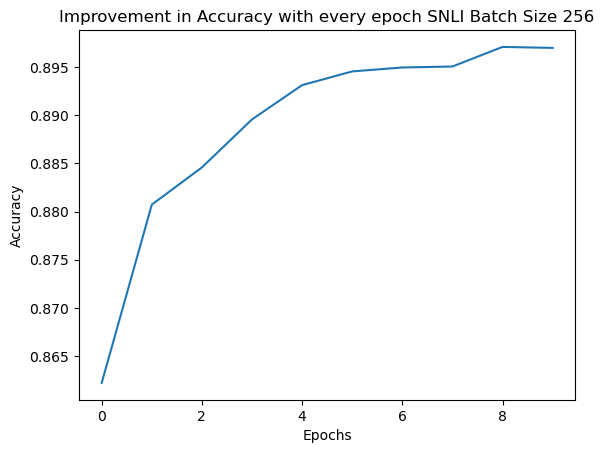

In [242]:
# plt.figure(figsize=(12,10))
sns.lineplot(x = epoch_results.index, y = epoch_results['eval_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Improvement in Accuracy with every epoch SNLI Batch Size 256")

In [ ]:
python run.py --do_train --task nli --dataset snli --output_dir ./trained_model_nli_b256/ --per_device_train_batch_size 256 --per_device_eval_batch_size 256 --save_strategy "epoch" --save_training_dynamics


In [244]:
predictions_files = pd.read_json(f'{dirs}/checkpoint-2148/eval_predictions.jsonl',lines=True)
predictions_files['type'] = folder
predictions_files['accuracy'] = np.where(predictions_files['label'] == predictions_files['predicted_label'],1,0)
predictions_files['category'] = predictions_files['id'].map(a)
y = predictions_files.groupby(['category'])['accuracy'].mean().reset_index().transpose()
y[3] = predictions_files['accuracy'].mean()
y[4] = folder

In [245]:
y

,0,1,2,3,4
category,ambiguous,easy-to-learn,hard-to-learn,0.889555,eval_metrics.json
accuracy,0.820305,0.999774,0.794715,0.889555,eval_metrics.json


In [246]:
predictions_files.head()

,premise,hypothesis,label,id,predicted_scores,predicted_label,type,accuracy,category
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,1,0,"[-1.676037073135376, 3.549700498580932, -2.008...",1,eval_metrics.json,1,easy-to-learn
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,0,1,"[2.8812239170074463, -0.6972800493240351, -1.8...",0,eval_metrics.json,1,easy-to-learn
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,2,2,"[-3.320770978927612, -1.88656485080719, 4.5201...",2,eval_metrics.json,1,easy-to-learn
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,0,3,"[2.778428792953491, -0.433261781930923, -2.089...",0,eval_metrics.json,1,hard-to-learn
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,1,4,"[-2.203276872634887, 1.548272848129272, 0.4329...",1,eval_metrics.json,1,ambiguous


In [247]:
predictions_files['label'].value_counts()

label
0    3329
2    3278
1    3235
Name: count, dtype: int64

In [248]:
predictions_files['predicted_label'].value_counts()

predicted_label
0    3336
2    3266
1    3240
Name: count, dtype: int64

In [249]:
td_metrics.head()

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
0,0,0,0.025020,0.974321,0.011581,3,0
1,1,1,0.013050,0.986775,0.010118,3,0
2,2,2,0.050777,0.946344,0.000266,3,0
3,3,3,0.023202,0.976233,0.006151,3,0
4,4,4,0.046070,0.951586,0.003785,3,0


In [251]:
td_metrics.shape

(549367, 7)